<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/assignment_02_assignment_02_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Linear supervised regression
<hr>

## 0. Import library
<hr>
Import library

In [129]:
# Import libraries

# math library
import numpy as np
import torch

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>
Load a set of data pairs $\{ x_i, y_i \}_{i=1}^n$ where $x$ represents label and $y$ represents target.

In [130]:
# import data with numpy
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/profit_population.txt', delimiter=',')

## 2. Explore the dataset distribution
<hr>

Plot the training data points.

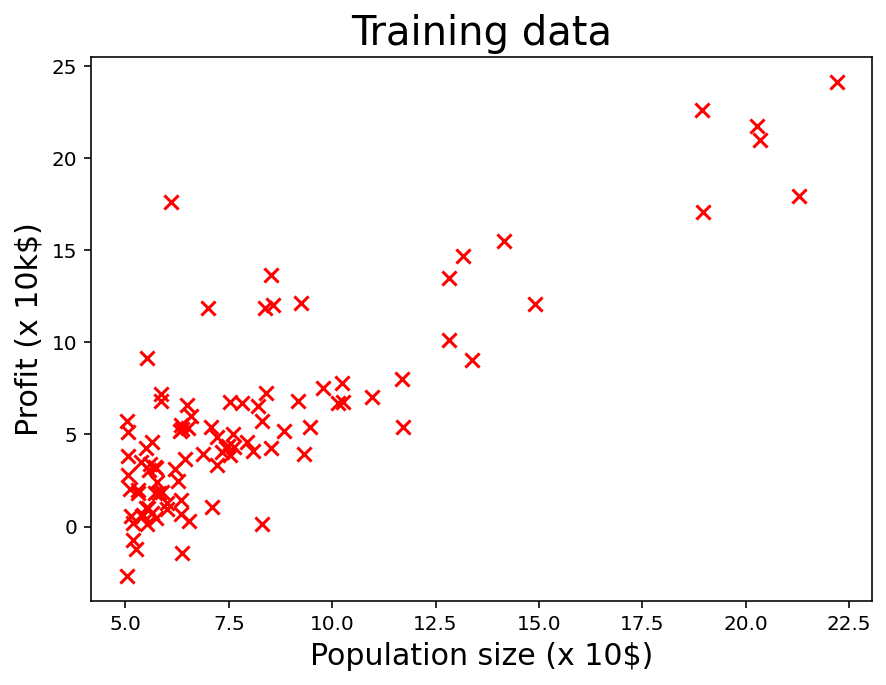

In [131]:
x_train = torch.from_numpy(data[:,0]).type(dtype = torch.float32)
x_train = x_train.view(-1,1)
y_train = torch.from_numpy(data[:,1]).type(dtype = torch.float32)
y_train = y_train.view(-1,1)

plt.figure(figsize=(7,5))
plt.scatter(x_train,y_train, marker = 'x', s = 50, c = 'red')
plt.title("Training data", fontsize = 20)
plt.xlabel("Population size (x 10$)", fontsize = 15)
plt.ylabel("Profit (x 10k$)", fontsize = 15)
plt.show()

## 3. Define the linear prediction function 
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

### Vectorized implementation:
$$
f_w(x) = X w 
$$
with 
<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_1 \\ 
1 & x_2 \\ 
\vdots\\
1 & x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 
\end{array} 
\right]
\quad
\Rightarrow 
\quad
f_w(x) = X w  =
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear predictive function.

In [132]:
#넘파이 텐서로 바꾸기
ones = torch.ones_like(x_train)
ones = ones.view(-1,1)


# construct data matrix
X = torch.cat((ones,x_train),dim = 1)

# parameters vector
w = torch.rand(2,1)
# predictive function definition
def f_pred(X,w): 
    
    f = torch.matmul(X,w)
    
    return f 

# Test predicitive function 
y_pred = f_pred(X,w)
print(y_pred.shape)

torch.Size([97, 1])


## 4. Define the linear regression loss 
<hr>
$$
L(w)=\frac{1}{n} \sum_{i=1}^n \ \Big( f_w(x_i) – y_i \Big)^2
$$

### Vectorized implementation:
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
with 
$$
Xw=
\left[ 
\begin{array}{cccc}
w_0 + w_1 x_1 \\ 
w_0 + w_1 x_2 \\ 
\vdots\\
w_0 + w_1 x_n
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

Implement the vectorized version of the linear regression loss function.

In [133]:
# loss function definition
def loss_mse(y_pred,y): 

    loss = float(torch.matmul((y_pred-y).T,(y_pred-y)) / y_pred.shape[0])
    
    return loss


# Test loss function 
y = y_train # label 
y_pred = f_pred(X,w)# prediction

loss = loss_mse(y_pred,y)
print(loss)

52.39557647705078


## 5. Define the gradient of the linear regression loss 
<hr>

### Vectorized implementation: Given the loss
$$
L(w)=\frac{1}{n} (Xw-y)^T(Xw-y)
$$
The gradient is given by  
$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(Xw-y)
$$


Implement the vectorized version of the gradient of the linear regression loss function.

In [134]:
# gradient function definition
def grad_loss(y_pred,y,X):
    grad = 2 * torch.matmul(X.T,(y_pred - y)) / y_pred.shape[0]
    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)
grad

tensor([[  -9.5691],
        [-112.9863]])

## 6. Implement the gradient descent algorithm 
<hr>

$\bullet$ Vectorized implementation: 
$$
w^{k+1} = w^{k} - \tau  \frac{2}{n} X^T(Xw^{k}-y)
$$

### Implement the vectorized version of the gradient descent function.

### Plot the loss values $L(w^k)$ with respect to iteration $k$ the number of iterations.

Time= 0.1331791877746582
tensor([8.9575])
tensor([[-3.7570],
        [ 1.1791]])


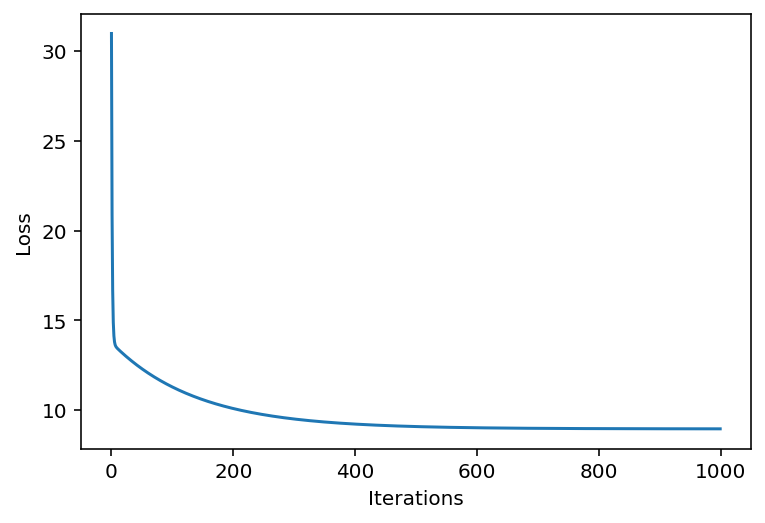

In [135]:
# gradient descent function definition
def grad_desc(X, y, w_init, tau, max_iter):

    L_iters = torch.empty(max_iter,1)# record the loss values
    w_iters = torch.empty(max_iter,2,1)# record the parameter values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X,w)  # linear predicition function
        grad_f = grad_loss(y_pred,y,X)  # gradient of the loss 
        w = w - tau * grad_f  # update rule of gradient descent 
        L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
        w_iters[i,:] = w  # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm 
start = time.time()
w_init = torch.randn(2,1)
tau = 0.01
max_iter = 1000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

print('Time=',time.time() - start) # plot the computational cost
print(L_iters[-1]) # plot the last value of the loss
print(w_iters[-1,:]) # plot the last value of the parameter w 


# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

## 7. Plot the linear prediction function
<hr>
$$
f_w(x) = w_0 + w_1 x
$$

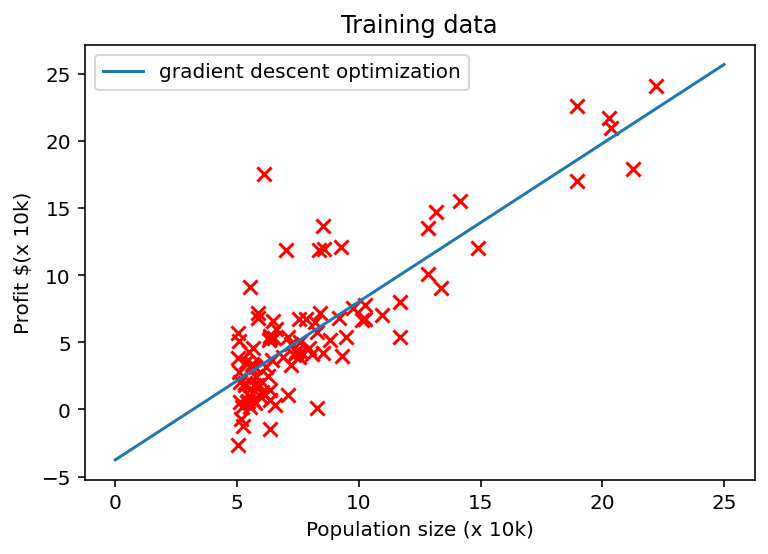

In [136]:
# linear regression model
x_pred = torch.from_numpy(np.linspace(0,25,100)).type(dtype = torch.float32) # define the domain of the prediction function
x_pred = x_pred.view(-1,1)
#넘파이 텐서로 바꾸기
ones = torch.ones_like(x_pred)
ones = ones.view(-1,1)
# construct data matrix
X = torch.cat((ones,x_pred),dim = 1)

y_pred = f_pred(X,w)# compute the prediction values within the given domain x_pred

# plot
plt.figure(3)
plt.scatter(x_train,y_train, marker = 'x', s = 50, c = 'red')
plt.plot(x_pred,y_pred, label = "gradient descent optimization")
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 8. Comparison with Scikit-learn linear regression algorithm
<hr>
### Compare with the Scikit-learn solution

Time= 0.0010988712310791016
[[-3.89578056]
 [ 1.1930337 ]]
loss sklearn= 8.953944206237793
loss gradient descent= tensor([8.9575])


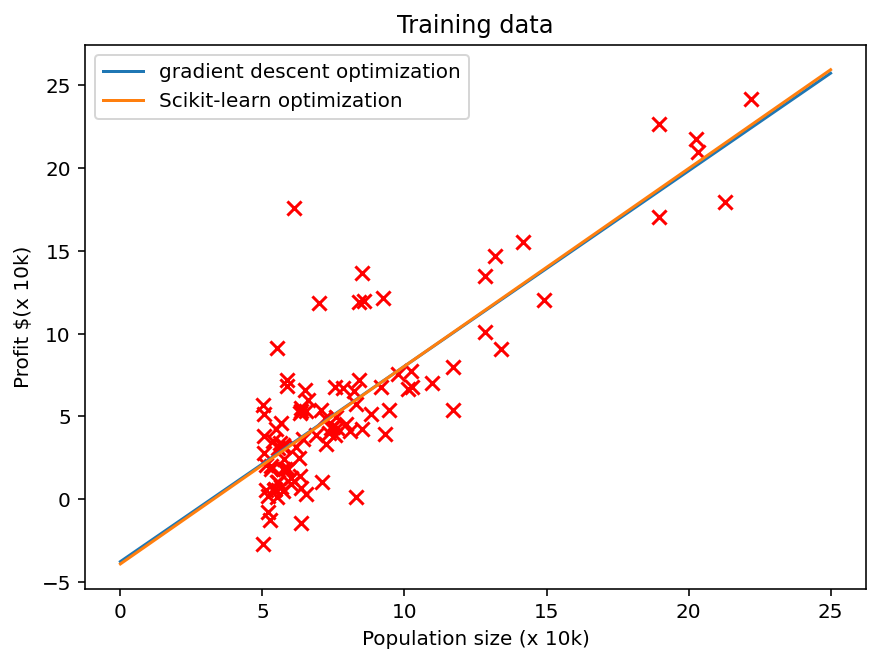

In [137]:
# run linear regression with scikit-learn
start = time.time()
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train, y_train) # learn the model parameters
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_

print(w_sklearn)
y_pred_sklearn = torch.from_numpy(lin_reg_sklearn.predict(x_train)).type(dtype = torch.float32)
loss_sklearn = loss_mse(y_pred_sklearn, y_train) # compute the loss from the sklearn solution

print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


y_pred_sklearn = lin_reg_sklearn.predict(x_pred)# prediction obtained by the sklearn library

# plot
plt.figure(figsize = (7,5))
plt.scatter(x_train,y_train, marker = 'x', s = 50, c = 'red')
plt.plot(x_pred,y_pred, label = "gradient descent optimization")
plt.plot(x_pred,y_pred_sklearn, label = "Scikit-learn optimization")
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 9. Plot the loss surface, the contours of the loss and the gradient descent steps
<hr>

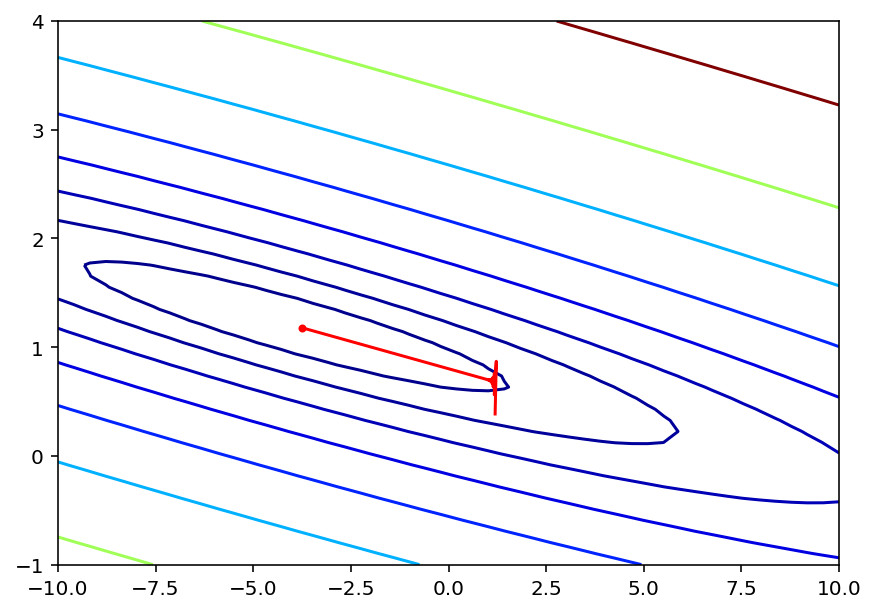

In [138]:
#w0
B0 = torch.from_numpy(np.linspace(-10, 10, 50)).type(dtype = torch.float32)
#w1
B1 = torch.from_numpy(np.linspace(-1, 4, 50)).type(dtype = torch.float32)
    
xx, yy = torch.meshgrid(B0, B1)
Z = torch.zeros(B0.shape[0],B1.shape[0])

for i in range(Z.shape[0]):
  for j in range(Z.shape[1]):
    Z[i,j] = sum((xx[i,j] + yy[i,j]*x_train - y_train)**2) / y_train.shape[0]

# 3D visualization
plt.figure(figsize=(7,5))
# Left plot
plt.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
plt.scatter(w[0],w[1],L_iters[-1], c = "red")
plt.plot(w_iters[:,0],w_iters[:,1], c = "red")
plt.show()

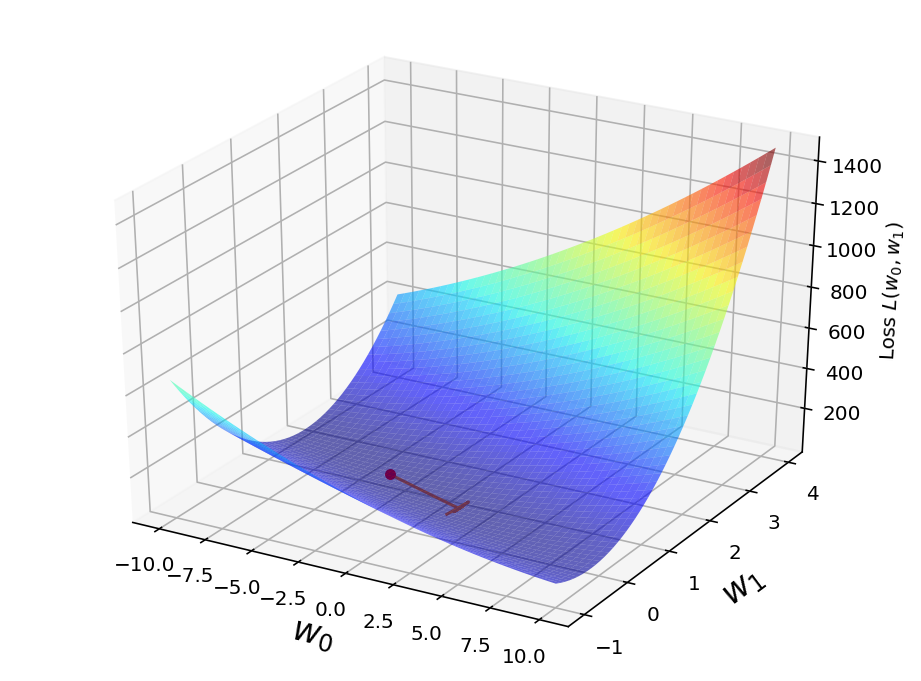

In [140]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection = '3d')
ax.plot_surface(xx.numpy(), yy.numpy(), Z.numpy(), rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax.plot(w_iters[:,0].numpy().flatten(),w_iters[:,1].numpy().flatten(),L_iters.numpy().flatten())
ax.scatter(w[0],w[1],L_iters[-1],c = "red")
ax.set_zlabel('Loss $L(w_0,w_1)$')
ax.set_xlabel(r'$w_0$', fontsize=17)
ax.set_ylabel(r'$w_1$', fontsize=17)
ax.set_zlim(Z.min(),Z.max())
plt.show()

# Output results

## 1. Plot the training data (1pt)

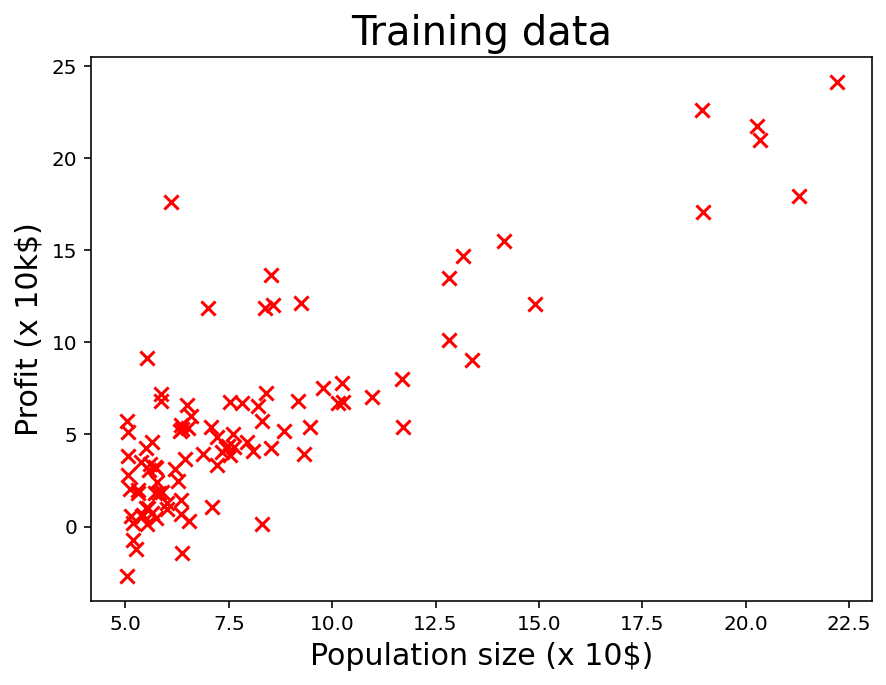

In [141]:
plt.figure(figsize=(7,5))
plt.scatter(x_train,y_train, marker = 'x', s = 50, c = 'red')
plt.title("Training data", fontsize = 20)
plt.xlabel("Population size (x 10$)", fontsize = 15)
plt.ylabel("Profit (x 10k$)", fontsize = 15)
plt.show()

## 2. Plot the loss curve in the course of gradient descent (2pt)

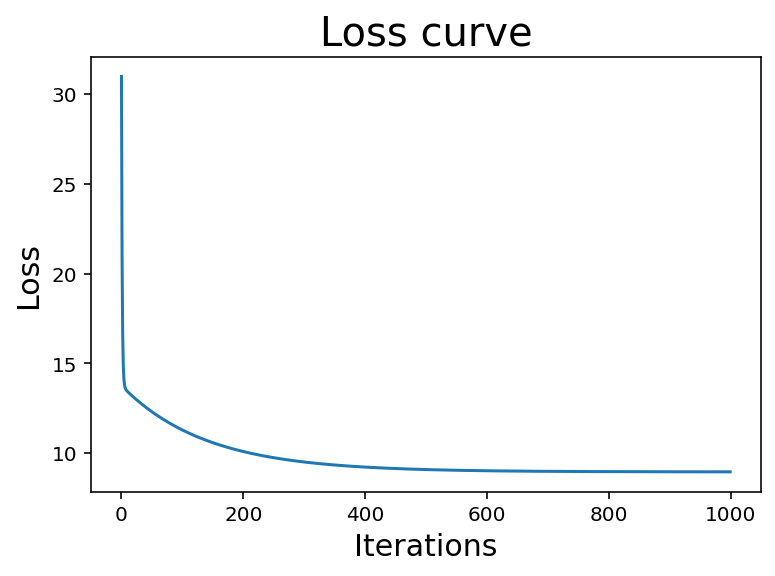

In [144]:
# plot
plt.figure(2)
plt.plot(L_iters) # plot the loss curve
plt.title("Loss curve", fontsize = 20)
plt.xlabel('Iterations', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.show()

## 3. Plot the prediction function superimposed on the training data (2pt)

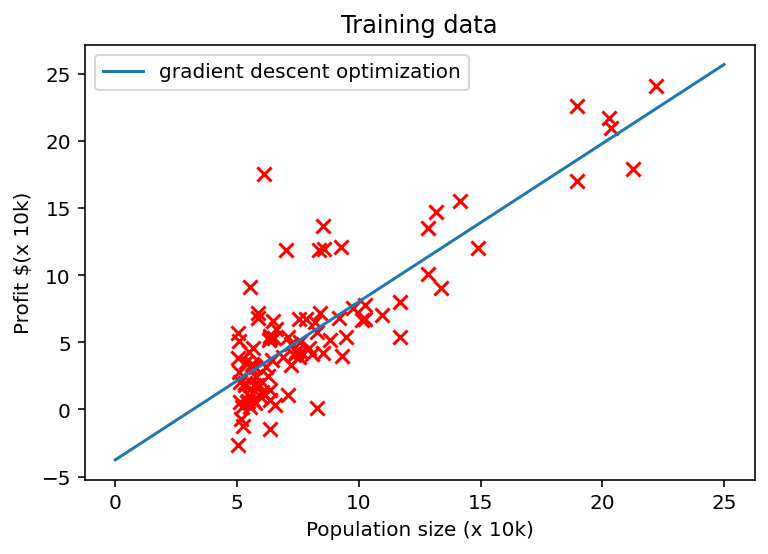

In [145]:
# plot
plt.figure(3)
plt.scatter(x_train,y_train, marker = 'x', s = 50, c = 'red')
plt.plot(x_pred,y_pred, label = "gradient descent optimization")
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 4. Plot the prediction functions obtained by both the Scikit-learn linear regression solution and the gradient descent superimposed on the training data (2pt)

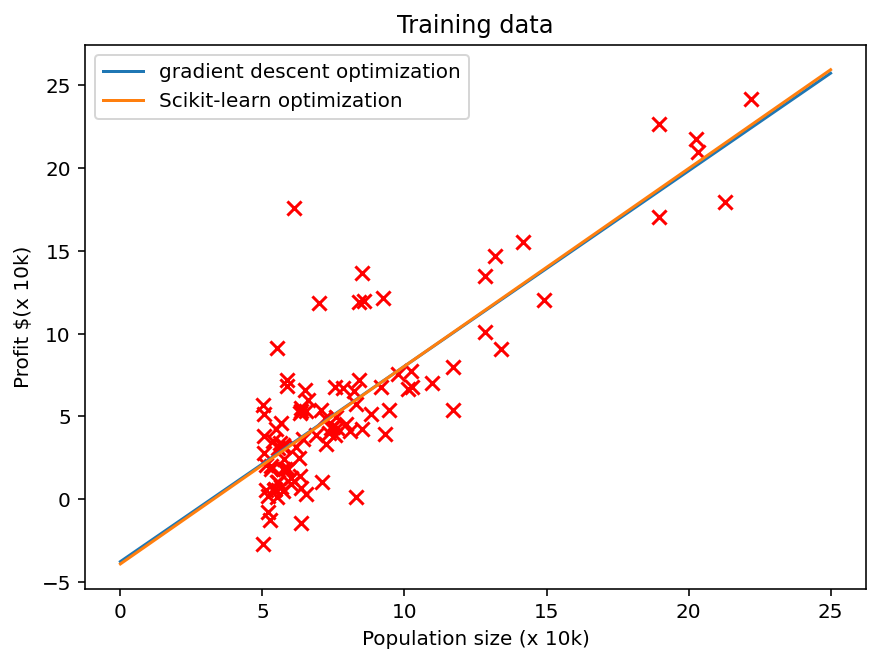

In [146]:
# plot
plt.figure(figsize = (7,5))
plt.scatter(x_train,y_train, marker = 'x', s = 50, c = 'red')
plt.plot(x_pred,y_pred, label = "gradient descent optimization")
plt.plot(x_pred,y_pred_sklearn, label = "Scikit-learn optimization")
plt.legend(loc='best')
plt.title('Training data')
plt.xlabel('Population size (x 10k)')
plt.ylabel('Profit $(x 10k)')
plt.show()

## 5. Plot the loss surface (right) and the path of the gradient descent (2pt)

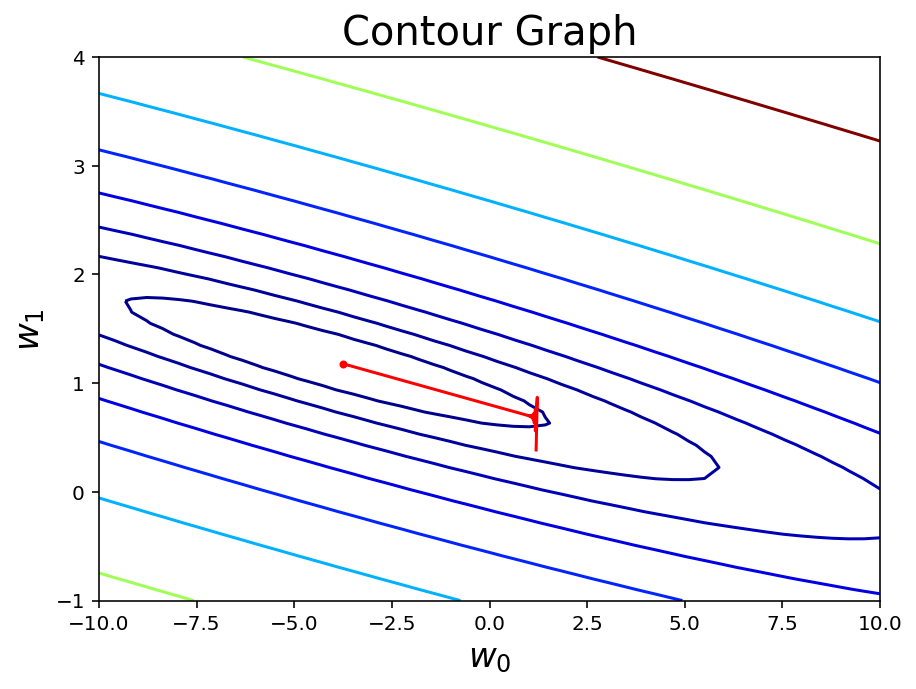

In [151]:
# 3D visualization
plt.figure(figsize=(7,5))
# Left plot
plt.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
plt.scatter(w[0],w[1],L_iters[-1], c = "red")
plt.plot(w_iters[:,0],w_iters[:,1], c = "red")
plt.title("Contour Graph",fontsize = 20)
plt.xlabel(r'$w_0$', fontsize=17)
plt.ylabel(r'$w_1$', fontsize=17)
plt.show()

## 6. Plot the contour of the loss surface (left) and the path of the gradient descent (2pt)

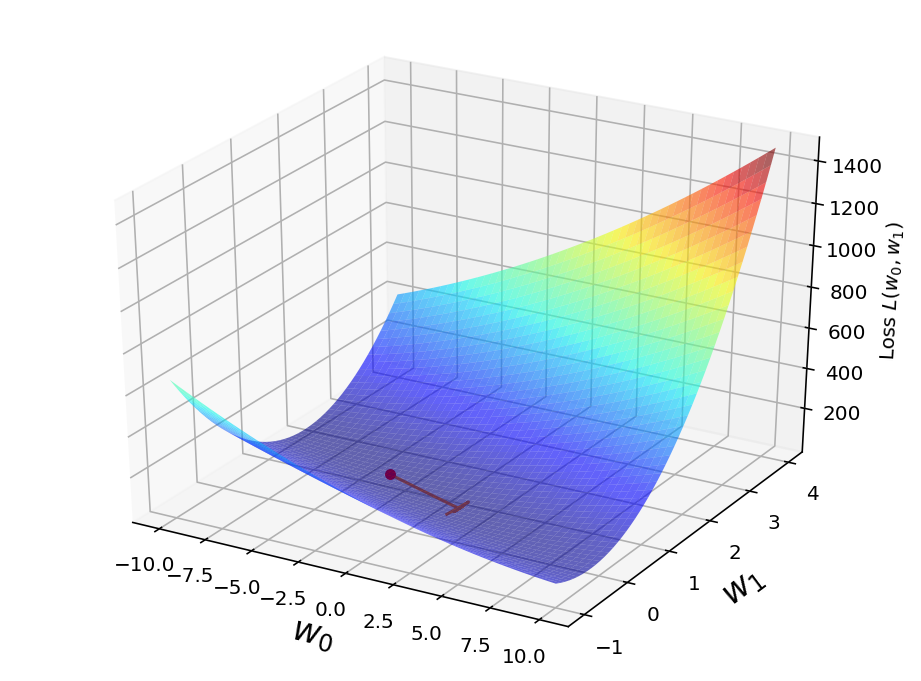

In [152]:
fig = plt.figure(figsize = (8,6))
ax = fig.gca(projection = '3d')
ax.plot_surface(xx.numpy(), yy.numpy(), Z.numpy(), rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax.plot(w_iters[:,0].numpy().flatten(),w_iters[:,1].numpy().flatten(),L_iters.numpy().flatten())
ax.scatter(w[0],w[1],L_iters[-1],c = "red")
ax.set_zlabel('Loss $L(w_0,w_1)$')
ax.set_xlabel(r'$w_0$', fontsize=17)
ax.set_ylabel(r'$w_1$', fontsize=17)
ax.set_zlim(Z.min(),Z.max())
plt.show()